<a href="https://colab.research.google.com/github/zaccowan/Cherokee_Seneca_EDA/blob/main/Cherokee_Seneca_2022_2024_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# Read Excel File from Github Repo

In [58]:
import requests
import pandas as pd

url = "https://github.com/zaccowan/Cherokee_Seneca_EDA/raw/refs/heads/main/Senakee_Invasive.xlsx"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

senakee2024 = pd.read_excel(dest, sheet_name=0, header=1)
senakee2022 = pd.read_excel(dest, sheet_name=1, header=1)

In [59]:
senakee2024.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
0,Cherokee1,New trail goes thru buffer edge,12.0,3.0,5.0,7.0,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",...,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20
1,Cherokee2,By trail amd dog run fence,3.0,0.0,2.0,2.0,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",...,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15
2,Cherokee3,"Close to interstate fence, looks like foliage ...",1.0,0.0,4.0,5.0,2.60,97.40,"Oak, basswood, maple","Maple, ash",...,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10
3,Cherokee4,Narrow spit between roads and creek,13.0,3.0,4.0,6.0,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",...,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19
4,Cherokee5,Mature LOMA with fruit above parking lot,15.0,12.0,3.0,20.0,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7


# Cleanup

In [60]:
senakee2024.isnull().sum()

,0
Comment,0
Description,51
N,29
E,28
S,28
W,28
Calculated using formula in densiometer,2
Calculated using formula in densiometer.1,2
Canopy,28
Understory,28


In [61]:
senakee2022.isnull().sum()

,0
Comment,0
Description,71
N,0
E,0
S,0
W,1
Calculated using formula in densiometer,1
Calculated using formula in densiometer.1,1
Canopy,2
Understory,2


# Obseravtions about initial data:
- 2022 data had less missing values
- 2024 data had more missing values but had more initial values.

In [62]:
senakee2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Comment                                    227 non-null    object 
 1   Description                                176 non-null    object 
 2   N                                          198 non-null    float64
 3   E                                          199 non-null    float64
 4   S                                          199 non-null    float64
 5   W                                          199 non-null    float64
 6   Calculated using formula in densiometer    225 non-null    float64
 7   Calculated using formula in densiometer.1  225 non-null    float64
 8   Canopy                                     199 non-null    object 
 9   Understory                                 199 non-null    object 
 10  Lonicera japonica         

In [63]:
senakee2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Comment                                    209 non-null    object 
 1   Description                                138 non-null    object 
 2   N                                          209 non-null    int64  
 3   E                                          209 non-null    int64  
 4   S                                          209 non-null    int64  
 5   W                                          208 non-null    float64
 6   Calculated using formula in densiometer    208 non-null    float64
 7   Calculated using formula in densiometer.1  208 non-null    float64
 8   Canopy                                     207 non-null    object 
 9   Understory                                 207 non-null    object 
 10  Lonicera japonica         

# Observations:
- most of the data is numerical data already "encoded" since it is a rating scale used by Olmsted
- The comments, descriptions, and NSEW directional measurements are not particularly useful for EDA purposes.

In [64]:
# drop columns that will not be useful in EDA.
senakee2024.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)
senakee2022.drop(columns=['Description', 'N', "E", "S", "W"], inplace=True)

In [65]:
# Rename Densiometer calculation columns and canopy gap
senakee2024.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)
senakee2022.rename(columns={'Calculated using formula in densiometer': "canopy_covered_percent",
                            'Calculated using formula in densiometer.1': "canopy_not_covered_percent",
                            'Canopy gap and/or downed trees present': "canopy_gap_or_downed_trees"}, inplace=True)

In [66]:
senakee2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Comment                      227 non-null    object 
 1   canopy_covered_percent       225 non-null    float64
 2   canopy_not_covered_percent   225 non-null    float64
 3   Canopy                       199 non-null    object 
 4   Understory                   199 non-null    object 
 5   Lonicera japonica            199 non-null    float64
 6   Microstegium vimineum        199 non-null    float64
 7   Euonymus alatus              199 non-null    float64
 8   Ampelopsis brevipedunculata  199 non-null    float64
 9   Morus alba                   199 non-null    float64
 10  Celastrus orbiculatus        199 non-null    float64
 11  Vinca minor                  198 non-null    float64
 12  Euonymus fortunei            199 non-null    float64
 13  Akebia quinata      

# Spliting data into Cherokee and Senca

In [80]:
cherokee2024 = senakee2024[0:173]
cherokee2024.tail()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
168,Cherokee169,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",1.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8
169,Cherokee170,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",0.0,0.0,0.0,2.0,0.0,...,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8
170,Cherokee171,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",1.0,0.0,0.0,1.0,0.0,...,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9
171,Cherokee172,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",3.0,0.0,0.0,3.0,0.0,...,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18
172,Cherokee173,18.46,81.54,"Maple, hickory, red oak, tulip poplar,","Hackberry, elderberry, hickory, oak",1.0,0.0,3.0,3.0,0.0,...,5.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,17


In [81]:
cherokee2022 = senakee2022[0:164]
cherokee2022.tail()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
159,Cherokee169,18.72,81.28,"Ash, oak, butternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe...",0,0,0,3,0,...,4,0,0,0,2,4,0.0,0.0,1.0,13
160,Cherokee170,31.98,68.02,"Osageorange, chinkapin oak, ash, tilia, sugar ...","Hackberry, cercis, ash, oak, maple, juniper, elm",0,0,0,3,0,...,0,0,0,0,0,4,0.0,1.0,1.0,8
161,Cherokee171,25.22,74.78,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h...",4,0,2,0,0,...,4,0,0,0,0,2,2.0,0.0,2.0,14
162,Cherokee172,22.36,77.64,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash",2,0,1,0,0,...,3,0,0,0,0,4,0.0,2.0,1.0,15
163,Cherokee173,15.86,84.14,"Mulberry, elm,maple","Walnut, red oak,box elder, carya sp, ash, mulb...",2,1,1,4,4,...,3,0,0,0,1,2,1.0,0.0,2.0,19


In [82]:
seneca2024 = senakee2024.drop(senakee2024.index[0:173])
seneca2024.head()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
173,Seneca1,5.20,94.80,"Cherry, hickory, maple","Hackberry, viburnum, locust",0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,7
174,Seneca2,0.26,99.74,"Maple, cherry, ash","Ash,redbud",0.0,0.0,0.0,1.0,0.0,...,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,11
175,Seneca3,5.20,94.80,"Oak, cherry, hackberry","Redbud, ash",0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9
176,Seneca4,5.72,94.28,"Hackberry, walnut, maple, hackberry","Beautyberry,",1.0,0.0,1.0,2.0,0.0,...,4.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,0.0,15
177,Seneca5,2.60,97.40,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle",0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,10


In [83]:
seneca2022 = senakee2022.drop(senakee2022.index[0:164])
seneca2022.head()

,Comment,canopy_covered_percent,canopy_not_covered_percent,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_gap_or_downed_trees,SUM
164,Seneca1,8.58,91.42,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash",0,0,0,1,0,...,4,0,0,0,0,4,0.0,0.0,0.0,9
165,Seneca2,1.04,98.96,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry",0,0,0,0,3,...,4,0,0,0,4,4,0.0,0.0,0.0,15
166,Seneca3,8.84,91.16,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud",2,0,0,2,0,...,4,0,0,0,0,3,0.0,0.0,0.0,11
167,Seneca4,3.12,96.88,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry",2,0,0,2,0,...,4,0,0,0,0,2,0.0,0.0,0.0,10
168,Seneca5,6.76,93.24,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder",3,0,0,4,0,...,4,0,0,0,0,3,1.0,0.0,0.0,15


# Count Plots

In [91]:
species_cols = senakee2024.columns[5:20]
print(species_cols)
measurement_cols = senakee2024.columns[5:]

Index(['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object')


<ipython-input-92-40f1160b634c>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

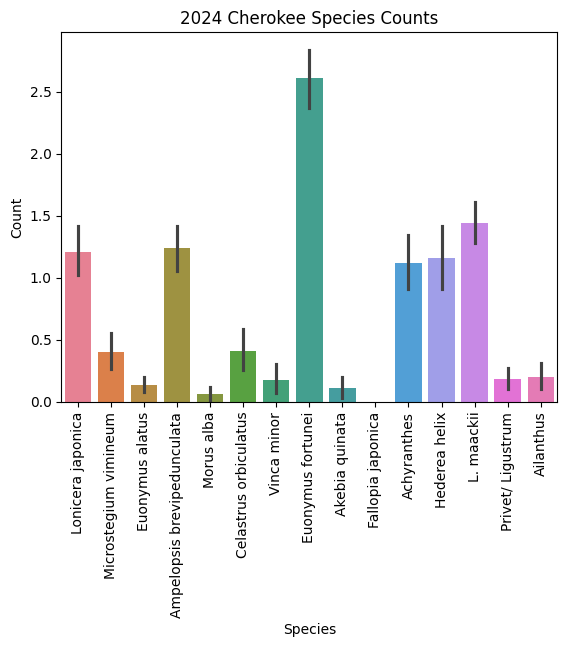

In [92]:
sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


<ipython-input-93-fd8c839c370b>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

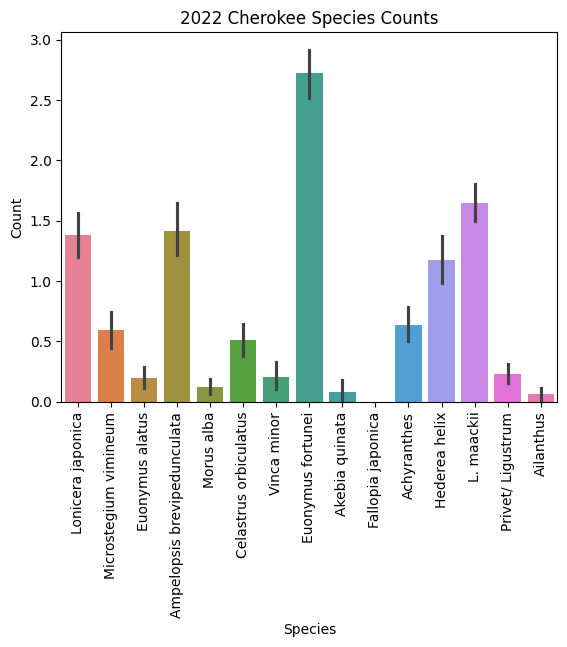

In [93]:
sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-94-fdfd02a745b9>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

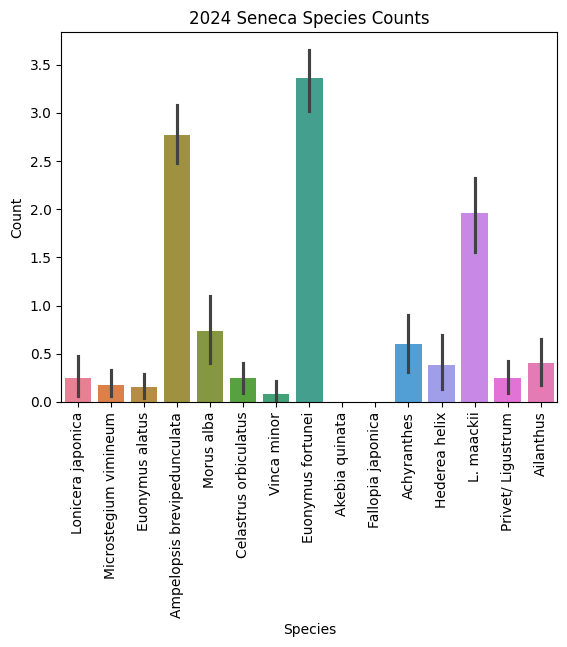

In [94]:
sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-95-ba13a66daa87>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

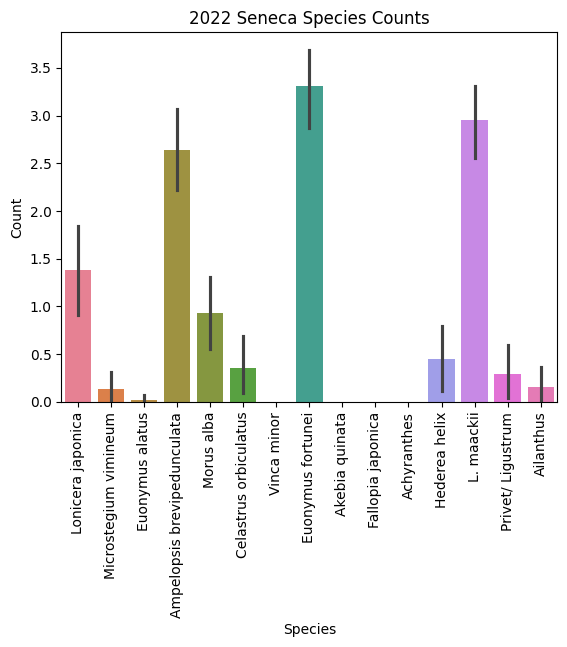

In [95]:
sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus']

# Barplot Observations about Parks


Euonymus fortunei, aka wintercreeper, is by far the most present invasive species in both Seneca and Cheorkee park.


<br>

Cheorkee:
- There was a noticable increase in Achyranthes from 2022 to 2024. This may indicate Achyranthes is a species that might need managment in the future.
-

Seneca:
- From 2022 to 2024 we see a significant decrease in Lonicera Japonica across the park.
- L. maackii has been significantly reduced between 2022 and 2024

Text(0.5, 1.0, '2022 Measurment Correlations')

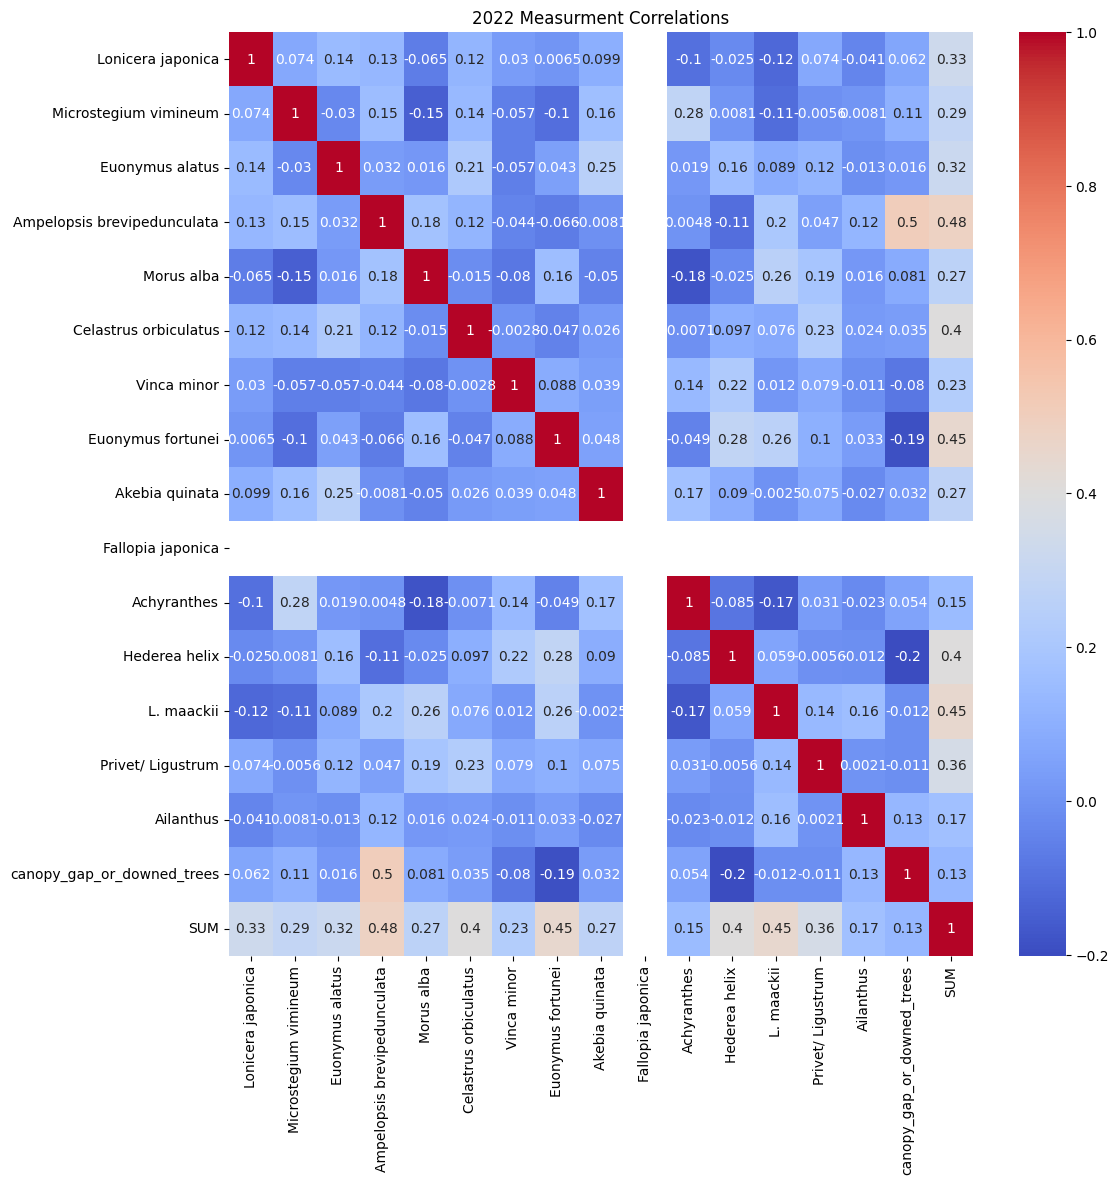

In [100]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2022[measurement_cols].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('2022 Measurment Correlations')

# Heatmap Observations

Most of the measured data has no correlation, but there is a 0.5 correlation between Ampelopsis brevipedunculata and canopy gap / downed trees. This may indicate that the presence of a large canopy gap or a lot of down trees allows Ampelopsis brevipedunculata to grow. It could also mean Ampelopsis brevipedunculata is causeing an increased canopy gap and downed trees.